In [1]:
import torch
import torch.fft
import h5py
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, "..")
from core.models.layers.kno_conv2d import dctn, idctn
sys.path.pop(0)

2023-12-26 21:31:23.529149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 21:31:23.529374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 21:31:23.529404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 21:31:23.538925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'..'

(330, 358)
(2660, 330, 358)
torch.float32
tensor(517.6823)


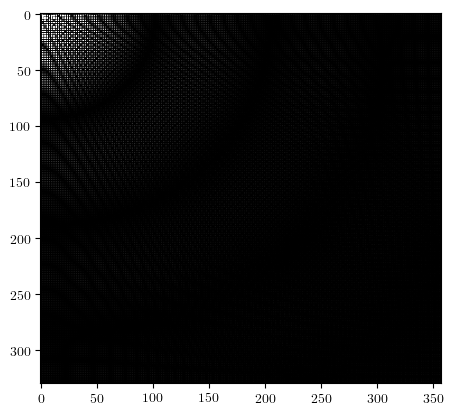

In [15]:
with h5py.File("../data/fdtd/raw/mrr_random-0089-p0.h5", "r") as f:
    eps = f["eps"][()]
    Ez = f["Ez"][()]
print(eps.shape)
print(Ez.shape)
eps = torch.tensor(eps, dtype=torch.float32)
# f_eps = torch.fft.rfftn(eps, dim=(-2, -1), norm="ortho")
f_eps = dctn(eps, dim=(-2, -1), norm="ortho")
print(f_eps.dtype)
# plt.imshow(eps, cmap="gray_r")
print(f_eps.abs().max())
plt.imshow(f_eps.abs(), cmap="gray", vmin=f_eps.abs().min(), vmax=10)
eps = torch.zeros_like(f_eps)
eps[:100, :100] = f_eps[:100, :100]
eps = idctn(eps, dim=(-2, -1), norm="ortho")
plt.imshow(eps, cmap="gray_r")


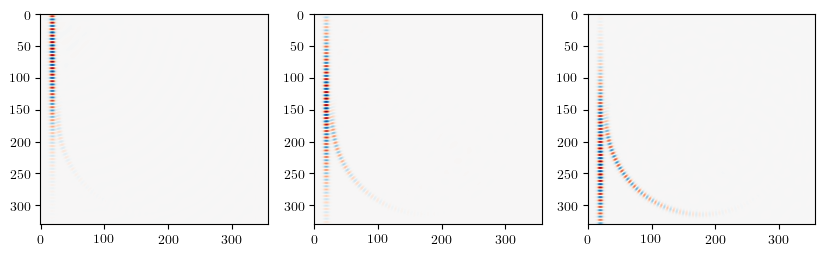

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
start = 300
axes[0].imshow(Ez[start], cmap="RdBu_r")
axes[1].imshow(Ez[start+50], cmap="RdBu_r")
axes[2].imshow(Ez[start+100], cmap="RdBu_r")

(1330, 165, 179)


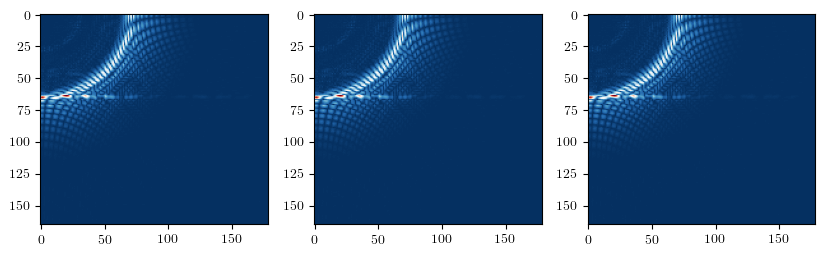

In [4]:
# f_Ez = torch.fft.fftn(torch.tensor(Ez, dtype=torch.complex64), dim=(-3, -2, -1))
f_Ez = dctn(torch.tensor(Ez[::2,::2,::2], dtype=torch.float), dim=(-3, -2, -1))
# f_Ez = torch.fft.fftshift(f_Ez, dim=(-3, -2, -1))
f_Ez = torch.abs(f_Ez)
f_Ez = f_Ez.numpy()
print(f_Ez.shape)
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
start = 300
axes[0].imshow(f_Ez[start], cmap="RdBu_r")
axes[1].imshow(f_Ez[start+50], cmap="RdBu_r")
axes[2].imshow(f_Ez[start+100], cmap="RdBu_r")

(580, 156)
(833, 580, 156)


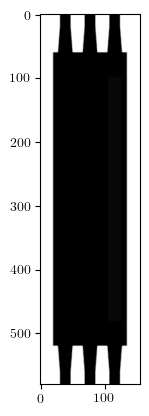

In [5]:
with h5py.File("../data/fdtd/raw/mmi_3x3_L_random-0060-p1.h5", "r") as f:
    eps = f["eps"][()]
    Ez = f["Ez"][()]
print(eps.shape)
print(Ez.shape)
plt.imshow(eps, cmap="gray_r")

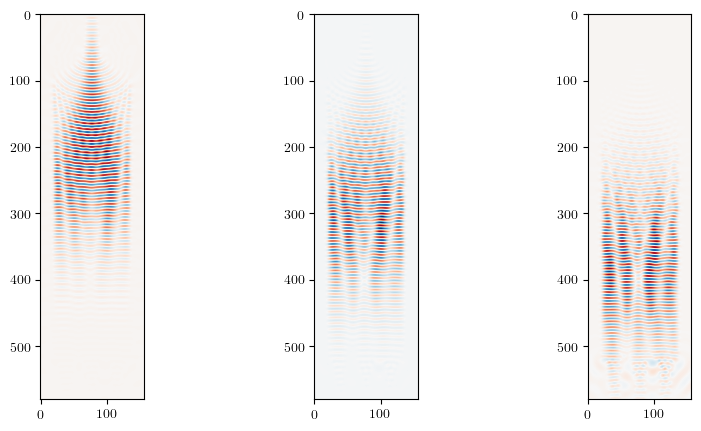

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
start = 400
axes[0].imshow(Ez[start], cmap="RdBu_r")
axes[1].imshow(Ez[start+50], cmap="RdBu_r")
axes[2].imshow(Ez[start+100], cmap="RdBu_r")

(833, 580, 156)


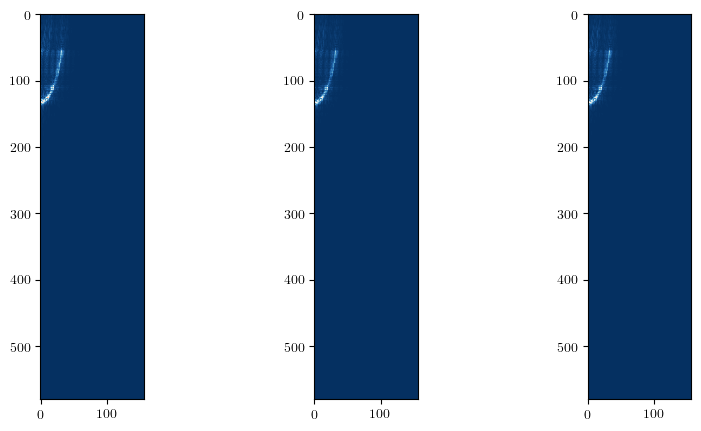

In [7]:
# f_Ez = torch.fft.fftn(torch.tensor(Ez[:, ::2,::2], dtype=torch.complex64), dim=(-3, -2, -1))
f_Ez = dctn(torch.tensor(Ez).float(), dim=(-3, -2, -1))
# f_Ez = torch.fft.fftshift(f_Ez, dim=(-3, -2, -1))
f_Ez = torch.abs(f_Ez)
f_Ez = f_Ez.numpy()
print(f_Ez.shape)
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
start = 300
axes[0].imshow(f_Ez[start], cmap="RdBu_r")
axes[1].imshow(f_Ez[start+50], cmap="RdBu_r")
axes[2].imshow(f_Ez[start+100], cmap="RdBu_r")